# Chocolate Scraping with Beautiful Soup

After eating chocolate bars your whole life, you've decided to go on a quest to find the greatest chocolate bar in the world.

You've found a website that has over 1700 reviews of chocolate bars from all around the world. It's linked below the text for the first task.

The data is displayed in a table, instead of in a `csv` or `json`. Thankfully, we have the power of BeautifulSoup that will help us transform this webpage into a DataFrame that we can manipulate and analyze.

The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

Some questions we thought about when we found this dataset were:
 - Where are the best cocao beans grown?
 - Which countries produce the highest-rated bars?
 - What's the relationship between cocao solids percentage and rating?
 
Can we find a way to answer these questions, or uncover more questions, using BeautifulSoup and Pandas?

## Make Some Chocolate Soup

1. Explore the webpage displayed in the browser. What elements could be useful to scrape here? Which elements do we _not_ want to scrape?

https://content.codecademy.com/courses/beautifulsoup/cacao/index.html

List of Tags to Include:

* tr
* td

List of Tags to Exclude:

* img

2. Let's make a request to this site to get the raw HTML, which we can later turn into a BeautifulSoup object.

   The URL is

```
https://content.codecademy.com/courses/beautifulsoup/cacao/index.html
```
   
   You can pass this into the `.get()` method of the `requests` module to get the HTML.

In [22]:
import requests

webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

3. Create a BeautifulSoup object called `soup` to traverse this HTML.

   Use `"html.parser"` as the parser, and the content of the response you got from your request as the document.

In [23]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(webpage.content, "html.parser")

4. If you want, print out the `soup` object to explore the HTML.

   So many table rows! You're probably very relieved that we don't have to scrape this information by hand.

In [24]:
# print(soup.prettify)

## How are ratings distributed?

5. How many terrible chocolate bars are out there? And how many earned a perfect 5? Let's make a histogram of this data.

   The first thing to do is to put all of the ratings into a list.
   
   Use a command on the `soup` object to get all of the tags that contain the ratings.

In [25]:
ratings_raw = soup.find_all(attrs = {"class": "Rating"})
# ratings_raw

6. Create an empty list called `ratings` to store all the ratings in.

In [26]:
ratings = []

7. Loop through the ratings tags and get the text contained in each one. Add it to the ratings list.

   As you do this, convert the rating to a float, so that the ratings list will be numerical. This should help with calculations later.

In [27]:
for rating in ratings_raw[1:]:
    ratings.append(float(rating.get_text()))

# print(ratings)

8. Using Matplotlib, create a histogram of the ratings values:

```py
plt.hist(ratings)
```

   Remember to show the plot using `plt.show()`!

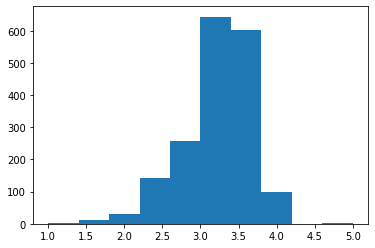

In [28]:
import matplotlib.pyplot as plt 

plt.hist(ratings)
plt.show()

## Which chocolatier makes the best chocolate?

9. We want to now find the 10 most highly rated chocolatiers. One way to do this is to make a DataFrame that has the chocolate companies in one column, and the ratings in another. Then, we can do a `groupby` to find the ones with the highest average rating.

   First, let's find all tags on the webpage that contain the company names.

In [29]:
company_tags = soup.find_all(attrs = {"class": "Company"}) # can also use soup.select(".Company)"
# company_tags

10. Just like we did with ratings, we now want to make an empty list to hold company names.

In [30]:
company_names = []

11. Loop through the tags containing the company names, and add the text from each tag to the list you just created.

In [31]:
for name in company_tags[1:]:
    company_names.append(name.get_text())

# company_names

12. Create a DataFrame with a column "Company" corresponding to your companies list, and a column "Ratings" corresponding to your ratings list.

In [32]:
import pandas as pd 
company_ratings = {"Company": company_names, "Ratings": ratings}
choc_df = pd.DataFrame.from_dict(company_ratings)

13. Use `.grouby` to group your DataFrame by Company and take the average of the grouped ratings.

    Then, use the `.nlargest` command to get the 10 highest rated chocolate companies. Print them out.
    
    Look at the hint if you get stuck on this step!

In [33]:
mean_ratings = choc_df.groupby("Company").Ratings.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Ratings, dtype: float64


## Is more cacao better?

14. We want to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

    It looks like the cocoa percentages are in the table under the Cocoa Percent column (note we are looking at cocoa not cocao!)
    
    Using the same methods you used in the last couple of tasks, create a list that contains all of the cocoa percentages. Store each percent as a float, after stripping off the `%` character.

In [34]:
cocoa_percents = []
cocoa_percent_tags = soup.find_all(attrs = {"class": "CocoaPercent"})

for percent in cocoa_percent_tags[1:]:
    percent = float(percent.get_text().strip('%'))
    cocoa_percents.append(percent)

# cocoa_percents

15. Add the cocoa percentages as a column called `"CocoaPercentage"` in the DataFrame that has companies and ratings in it.

In [35]:
cocoa = {"Company": company_names, "Ratings": ratings, "CocoaPercentage": cocoa_percents}
cocoa_df = pd.DataFrame.from_dict(cocoa)

16. Make a scatterplot of ratings (`your_df.Rating`) vs percentage of cocoa (`your_df.CocoaPercentage`).

    You can do this in Matplotlib with these commands:
    
```py
plt.scatter(df.CocoaPercentage, df.Rating)
plt.show()
```

Call `plt.clf()` to clear the figure between showing your histogram and this scatterplot.

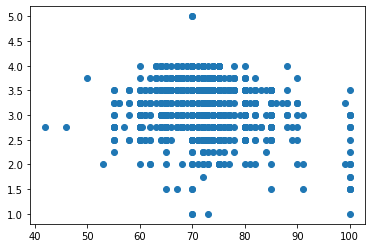

In [36]:
plt.scatter(cocoa_df.CocoaPercentage, cocoa_df.Ratings)
plt.show()

In [37]:
plt.clf()

<Figure size 432x288 with 0 Axes>

17. Is there any correlation here? We can use some numpy commands to draw a line of best-fit over the scatterplot.

    Copy this code and paste it after you create the scatterplot, but before you call `.show()`:
    
```py
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r-")
```

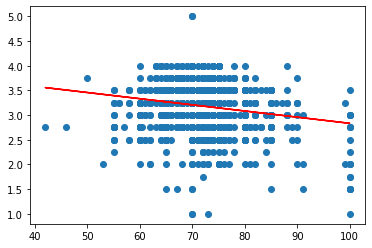

In [38]:
import numpy as np
plt.scatter(cocoa_df.CocoaPercentage, cocoa_df.Ratings)
z = np.polyfit(cocoa_df.CocoaPercentage, cocoa_df.Ratings, 1)
line_function = np.poly1d(z)
plt.plot(cocoa_df.CocoaPercentage, line_function(cocoa_df.CocoaPercentage), "r-")
plt.show()

## Explore!

18. We have explored a couple of the questions about chocolate that inspired us when we looked at this chocolate table.

    What other kinds of questions can you answer here? Try to use a combination of BeautifulSoup and Pandas to explore some more.
    
    For inspiration: Where are the best cocoa beans grown? Which countries produce the highest-rated bars?

Code below to show where the best cocoa beans grow.

In [39]:
origins = []
origin_tags = soup.select(".BroadBeanOrigin")

for origin in origin_tags[1:]:
    country = origin.get_text()
    origins.append(country)
    
beans = {"Bean Origin": origins, "CocoaPercentage": cocoa_percents}
beans_df = pd.DataFrame.from_dict(beans)

mean_percent = beans_df.groupby("Bean Origin").CocoaPercentage.mean()
ten_best = mean_percent.nlargest(10)
display(ten_best)

Bean Origin
Peru, Ecuador                   99.000000
Guat., D.R., Peru, Mad., PNG    88.000000
Samoa                           85.000000
Venezuela/ Ghana                85.000000
Sao Tome & Principe             79.357143
Central and S. America          78.000000
Principe                        77.000000
Carribean                       76.250000
El Salvador                     75.000000
Gabon                           75.000000
Name: CocoaPercentage, dtype: float64

Code below to show which countries produce the highest rated bars.

In [40]:
countries = []
country_tags = soup.select(".CompanyLocation")

for country in country_tags[1:]:
    country = country.get_text()
    countries.append(country)
    
bars = {"CompanyLocation": countries, "Rating": ratings}
bars_df = pd.DataFrame.from_dict(bars)

mean_rating = bars_df.groupby("CompanyLocation").Rating.mean()
ten_best = mean_rating.nlargest(10)
display(ten_best)

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Australia      3.357143
Guatemala      3.350000
Name: Rating, dtype: float64